# Customer Churn Prediction

### Introduction

This project aims to explore the Telco Customer Churn dataset from IBM with the goal of understanding customer churn and the associated contributing factors. Through a holistic methodology involving tasks like data loading, cleansing, exploration, visualization, feature engineering, and machine learning, the project aims to unveil patterns, correlations, and trends within the data. The objective is to offer actionable insights for decision-makers. Additionally, the project assesses the efficacy of three machine learning algorithms given below: 

- Logistic Regression
- Random Forest
- Support Vector Machine

### Importing Libraries

Importing all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import FitFailedWarning
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

### Exploratory Data Analysis 

Now, we will start with data analysis and exploration for the dataset Telco-Customer-Churn.csv.

Using the `head` method, we can read the first five rows of the dataset. This can help us see the variables and the type of values that they hold.

In [2]:
telco_data = 'Telco-Customer-Churn.csv'

In [3]:
telco_df = pd.read_csv(telco_data, skipinitialspace = True)
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Exploring further by looking at dataframe size and features.

In [4]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Column names (Features):

- **`customerID`**: ID of customer
- **`gender`**: Gender of customer
- **`SeniorCitizen`**: Whether the customer is a senior citizen (1 for yes and 0 for no)
- **`Partner`**: Whether the customer has a partner (Yes or No)
- **`Dependents`**: Whether the customer has dependent(s) (Yes or No)
- **`tenure`**: Customer's tenure in months
- **`PhoneService`**: Whether the customer has a phone service (Yes or No)
- **`MultipleLines`**: Whether the customer has multiple phone lines (Yes, No, or No phone service)
- **`InternetService`**: The customer's internet service (DSL, Fiber optic, or no)
- **`OnlineSecurity`**: Whether the customer has online security (Yes, No, or No internet service)
- **`OnlineBackup`**: Whether the customer has online backup (Yes, No, or No internet service)
- **`DeviceProtection`**: Whether the customer has device protection (Yes, No, or No internet service)
- **`TechSupport`**: Whether the customer has tech support (Yes, No, or No internet service)
- **`StreamingTV`**: Whether the customer has streaming TV (Yes, No, or No internet service)
- **`StreamingMovies`**: Whether the customer streams movie (Yes, No, or No internet service)
- **`Contract`**: Contract term of the customer (Month-to-month, One year, Two year)
- **`PaperlessBilling`**: Whether the customer has paperless billing (Yes or No)
- **`PaymentMethod`**: The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **`MonthlyCharges`**: The customer's monthly charges
- **`TotalCharges`**: The customer's total charges
- **`Churn`**: Whether the customer churned (Yes or No)

We can drop `customerID` column from our dataframe as it won't help in our further analysis.

In [5]:
telco_df.drop("customerID", axis = 1, inplace = True)

To see the data-types of all these columns, we have to use `info` method.

In [6]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


We can see that there is 1 float (`float64`), 2 integer (`int64`) and 18 categorical (`object`) variables.  

But we can see that `TotalCharges` variable has **object** data type. We have to change it to **numeric** data type using pandas `to_numeric()` function. By default, the function raises an error whenever a non-numeric data goes through it. To avoid that and make sure that non-numeric data is replaced by **NaN**, we can use the argument `errors='coerce'`.

In [7]:
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')

Now, we can check which columns have missing values using `isna()` function. Combined with `sum()` function, we can see the count of the number of missing values.

In [8]:
telco_df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are **11 observations** which have missing `TotalCharges` values. Since this is relatively very less than the total amount of observations, we can drop the rows with missing values.

In [9]:
telco_df.dropna(inplace = True)

To see the basic statistics of the numeric columns in the dataframe, we can use `describe()` function.

In [10]:
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


To see the statistics of non-numeric columns as well, we have to provide `include = ['object']` argument in our `describe` function. 

In [11]:
telco_df.describe(include = ['object'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


From the result above, we can see that an **average customer** has **Month-to-month** contract, pays via **electronic check** and is **not churned**.

We can apply different functions on dataframe using `apply` function. 

In [12]:
telco_df.apply(np.max)

gender                      Male
SeniorCitizen                  1
Partner                      Yes
Dependents                   Yes
tenure                        72
PhoneService                 Yes
MultipleLines                Yes
InternetService               No
OnlineSecurity               Yes
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies              Yes
Contract                Two year
PaperlessBilling             Yes
PaymentMethod       Mailed check
MonthlyCharges            118.75
TotalCharges              8684.8
Churn                        Yes
dtype: object

From the above output, we can observe the following:  
- The maximum number of months a person has stayed with the company is **72 months**.  
- Maximum contract is for **two years**.  
- Maximum monthly charge is **118.75**.

Before we delve into visualization, we can separate columns based on whether they are numerical or categorical. It will help us in visualization and building the machine learning model.

In [13]:
telco_num_features = list(telco_df.select_dtypes(include = ['int64', 'float64']).columns)
print("Numerical columns are: ", telco_num_features, "\n")
telco_cat_features = list(telco_df.select_dtypes(include = ['object']).columns)
print("Categorical columns are: ", telco_cat_features)

Numerical columns are:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'] 

Categorical columns are:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [14]:
telco_df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

### Data Visualization

Visualizing the distribution of churned v/s non-churned customers using seaborn

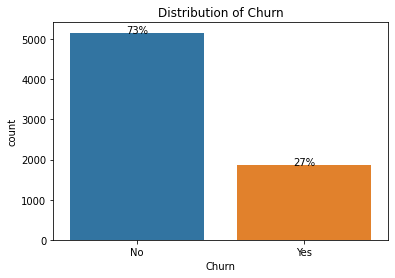

In [15]:
ax = sns.countplot(data=telco_df, x='Churn')
initial_x = 0
total = float(len(telco_df))
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), "{:.0f}%".format((i.get_height()/total)*100), ha='center')
    initial_x += 1
plt.title('Distribution of Churn')
plt.show()

We can see from the distribution above that about **73%** of the customers are **not churned**, while **27%** of the customers **churned**.

Visualizing numerical features' impact on `Churn` using bar graph.

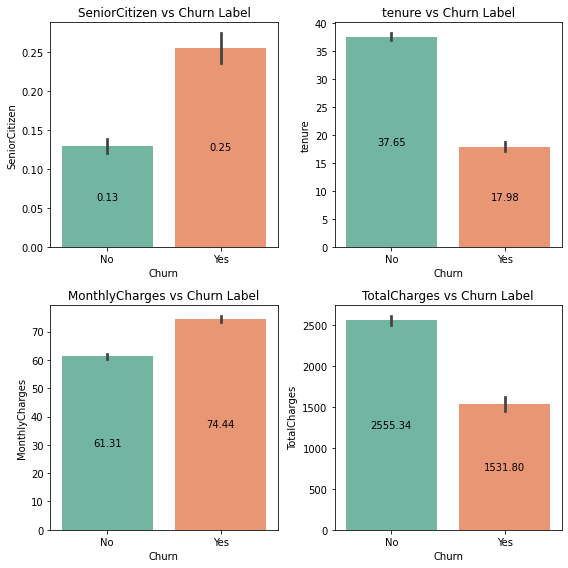

In [16]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 8))
axes = axes.flatten()
for i, feature in enumerate(telco_num_features):
    ax = axes[i]
    sns.barplot(data = telco_df, x = "Churn", y = feature, ax = ax, estimator = np.mean, palette='Set2')
    ax.set_title("{} vs Churn Label".format(feature))
    for j in ax.containers:
        ax.bar_label(j, label_type = "center", fmt = "%.2f")
plt.tight_layout()
plt.show()

From the above bar graphs, we can note the following insights:  
- Customers who are senior citizens tend to churn more than normal citizens.
- Customers who have stayed longer with the company (have larger tenure) are less likely to churn.
- Customers who have higher charges in general tend to churn more than customers with lower charges.
- Customers who have accumulated higher total charges are less likely to churn than those with lower total accumulated charges.

Visualizing correlation between numerical features and churn.

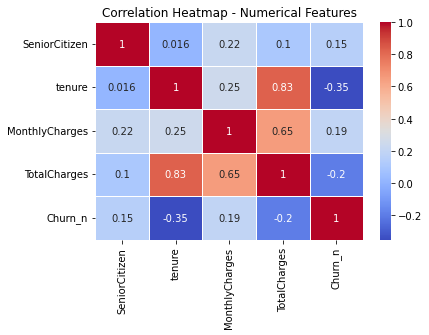

In [17]:
telco_df['Churn_n'] = telco_df['Churn'].map({"Yes":1, "No":0})
numerical_cols = telco_df.select_dtypes(include='number')
telecom_corr_matrix = numerical_cols.corr()
sns.heatmap(telecom_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap - Numerical Features')
plt.show()

From the above heatmap, we can note the following insights about the numerical features:  
- `Churn` and `tenure` have a negative correlation of **0.35**, the highest among all the other variables with respect to `Churn`.
- `TotalCharges` and `tenure` have the strongest correlation out of all the other variables, with the coefficient of **0.83**.

Checking numerical features for outliers using boxplot.

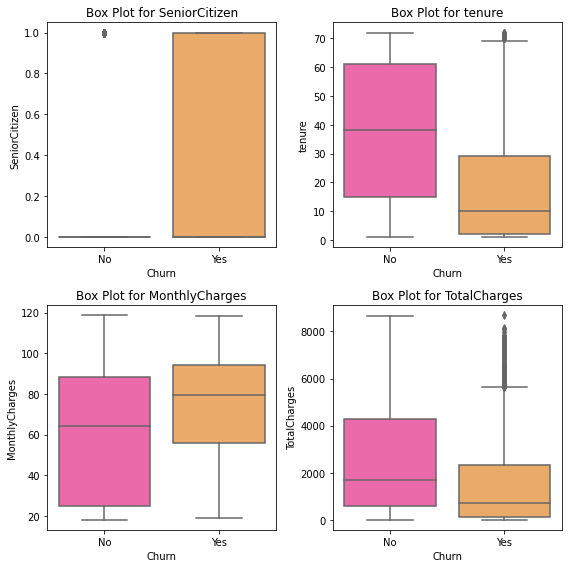

In [18]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 8))
axes = axes.flatten()
for i, feature in enumerate(telco_num_features):
    ax = axes[i]
    sns.boxplot(data = telco_df, x = 'Churn', y = feature, ax = ax, palette = "spring")
    ax.set_title('Box Plot for {}'.format(feature))
    ax.set_xlabel('Churn')
    ax.set_ylabel(feature)
plt.tight_layout()
plt.show()

We can observe from the above barplots that `tenure` and `TotalCharges` have outliers. To get a clearer look of their distribution, we can use histogram.

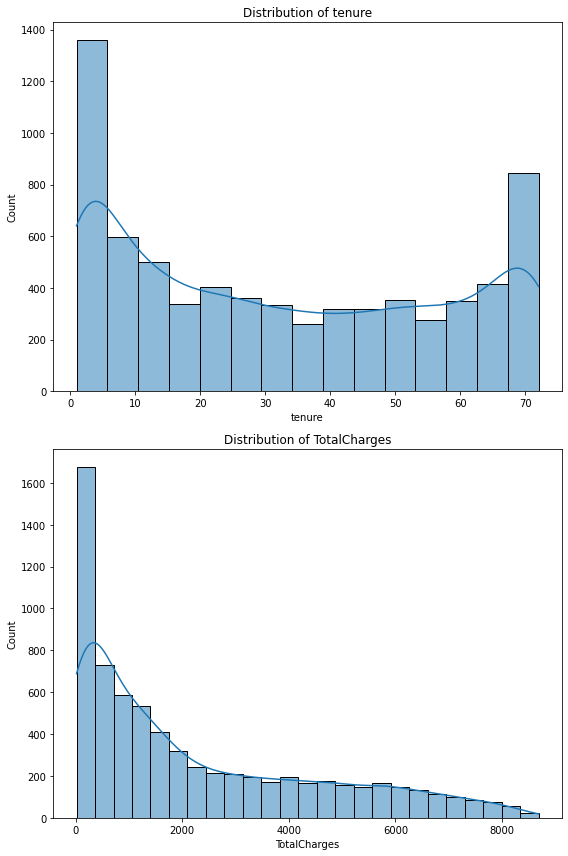

In [19]:
columns_with_outliers = ['tenure', 'TotalCharges']
fig, axes = plt.subplots(nrows = len(columns_with_outliers), ncols = 1, figsize = (8, 12))
for i, feature in enumerate(columns_with_outliers):
    ax = axes[i]
    sns.histplot(data = telco_df, x = feature, kde = True, ax = ax)
    ax.set_title("Distribution of {}".format(feature))
plt.tight_layout()
plt.show()

From the above histograms, we can see that there are not a large quantity of outliers in `tenure` column, but the `TotalCharges` column seems highly skewed and there are a huge number of outliers present in .

To mitigate the effect of outliers and make `TotalCharges` less skewed, we can apply log transformation.

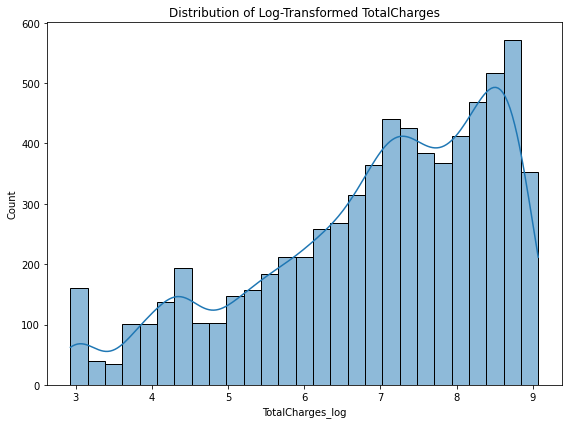

In [20]:
telco_df['TotalCharges_log'] = np.log(telco_df['TotalCharges'])
plt.figure(figsize=(8, 6))
sns.histplot(telco_df['TotalCharges_log'], kde=True)
plt.title('Distribution of Log-Transformed TotalCharges')
plt.tight_layout()
plt.show()

Now that we have analyzed the numerical features with respect to `Churn` and stabilized the variance of `TotalCharges` by using log transformation, we can move towards visualizing categorical features with respect to churn.

Visualizing the effect of categorical features on `Churn`.

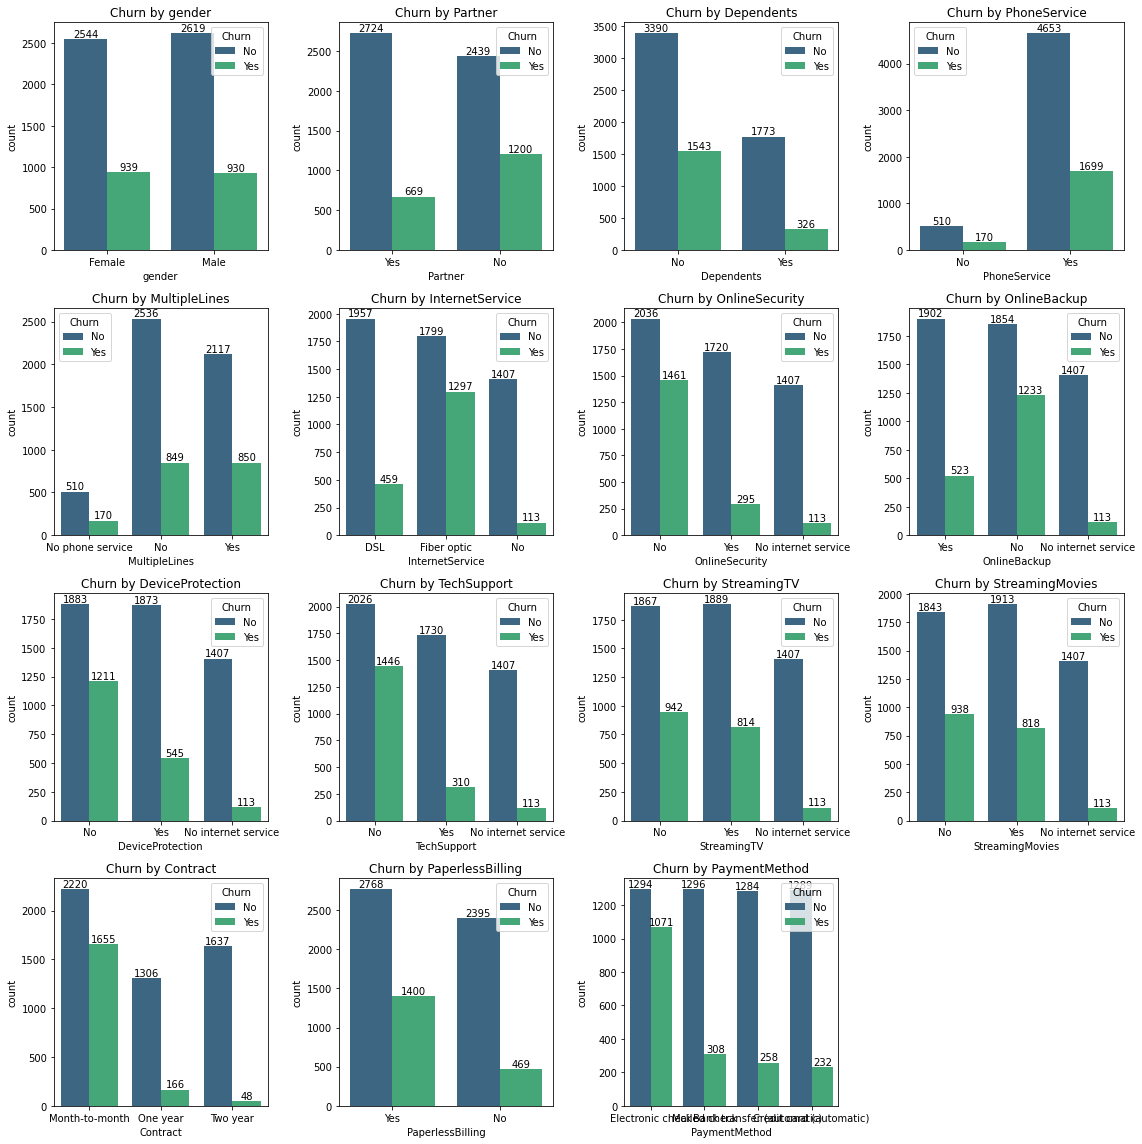

In [21]:
fig, axes = plt.subplots(4, 4, figsize = (16, 16))
axes = axes.flatten()
for i, col in enumerate(telco_cat_features):
    ax = axes[i]
    sns.countplot(data = telco_df, x = col, hue = "Churn", ax = ax, palette = "viridis")
    ax.set_title("Churn by {}".format(col))
    plt.tight_layout()
    for i in ax.containers:
        ax.bar_label(i)
plt.delaxes(ax = axes[-1])
plt.tight_layout()
plt.show()

From the above count plots, we can conclude that `gender` has little to no effect on `Churn`.

To visualize correlations between categorical features, we can use chi-square value and then use Cramer's V to put the chi-square value in the range between 0 and 1 to get the correlation values.

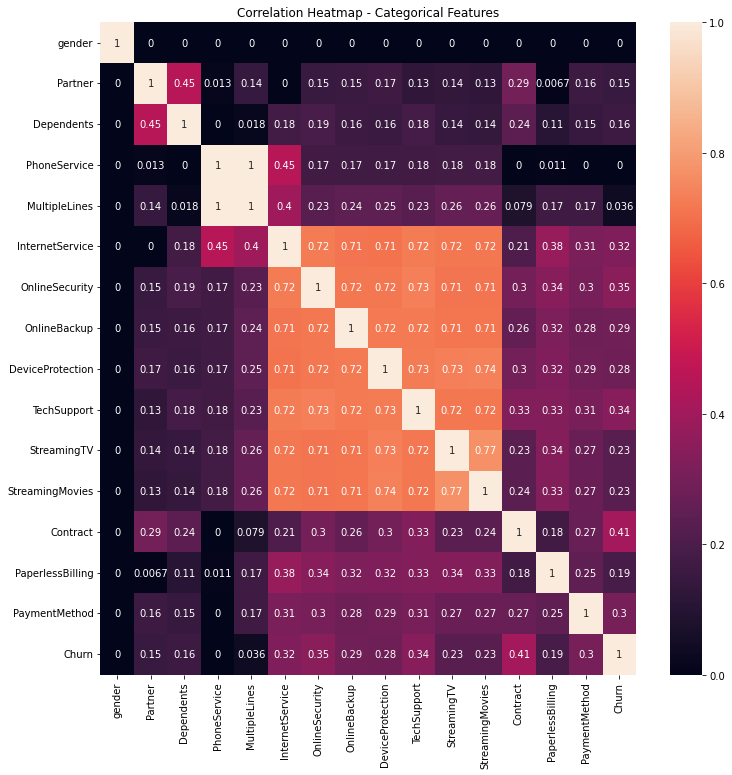

In [22]:
categorical_features = telco_df.select_dtypes(include=['object'])
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

categorical_features_encoded = categorical_features.apply(LabelEncoder().fit_transform)

corr_matrix = pd.DataFrame(index=categorical_features.columns, columns=categorical_features.columns, dtype=float)
for col1 in categorical_features.columns:
    for col2 in categorical_features.columns:
        corr_matrix.loc[col1, col2] = cramers_v(categorical_features_encoded[col1], categorical_features_encoded[col2])

plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap - Categorical Features')
plt.show()

From the above correlation heatmap of categorical features, we can observe that:  

- Customers with a higher tenure, multiple lines, internet service, and a contract are less likely to churn.
- Gender and phone service have no effect on whether the customer will churn or not. 

NOTE - There are a lot of independent features that are highly correlated with other independent features. This may result in **multicollinearity**, which affect the estimates of the machine learning model, which in turn can affect its accuracy. So before building the machine learning model, we have to deal with multicollinearity.

### Feature Selection and Engineering

Dropping irrelevant column(s) from `telco_df`. This will result in a better performing machine learning model. In our dataframe, `customerID`, `gender`, `Churn_n` and `PhoneService` seems irrelevant when it comes to predicting `Churn`. Therefore, we can remove those columns from the dataframe.

In [23]:
telco_df.drop(columns=["customerID", "gender", "PhoneService", "Churn_n"], inplace=True, errors="ignore")
telco_cat_features.remove("gender")
telco_cat_features.remove("PhoneService")
telco_cat_features

['Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

We can use **One-Hot Encoding** to convert categorical variables to numerical variables.

In [24]:
encoder = OneHotEncoder()
telco_encoded_array = encoder.fit_transform(telco_df[telco_cat_features])
df = pd.DataFrame(telco_encoded_array.toarray(), columns=encoder.get_feature_names_out(telco_cat_features))
telco_encod_df = pd.concat([telco_df.drop(columns=telco_cat_features), df], axis=1)
telco_encod_df.dropna(inplace = True)
telco_encod_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TotalCharges_log,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0.0,1.0,29.85,29.85,3.396185,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,34.0,56.95,1889.50,7.544068,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,2.0,53.85,108.15,4.683519,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,7.517928,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,2.0,70.70,151.65,5.021575,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


### Machine Learning Models 

Now that we have analyzed both the numerical and categorical features, and prepared the dataframe to build the machine learning model, we can start it by splitting the dataframe. I have split the data into **80%** training set and **20%** test set.

In [25]:
X = telco_encod_df.drop(['Churn_No', 'Churn_Yes', 'TotalCharges'], axis = 1)
y = telco_encod_df['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 18)

To reduce multicollinearity, we can use **dimensionality reduction**. One way to reduce the number of dimensions in our dataset is to use **Principal Component Analysis (PCA)**.

To get the optimum number of Principal Components, we can use Eigenvalues of each component.

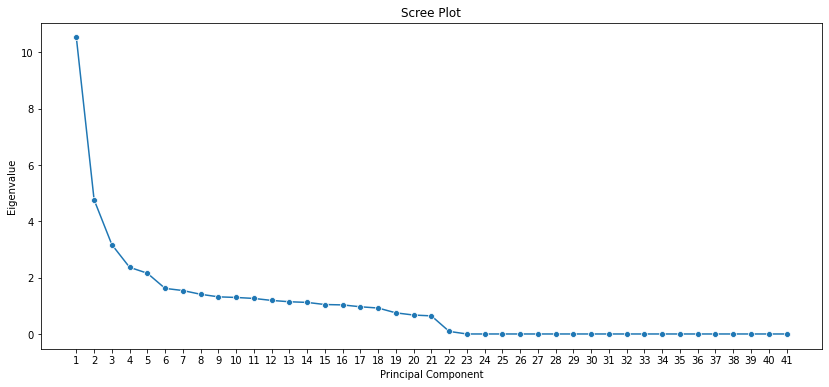

In [26]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_train)

pca_s = PCA()
pca_fit = pca_s.fit(data_scaled)

eigenvalues = pca_fit.explained_variance_

plt.figure(figsize=(14, 6))
sns.lineplot(x=range(1, len(eigenvalues) + 1), y=eigenvalues, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(np.arange(1, len(eigenvalues) + 1, step=1))
plt.title('Scree Plot')
plt.show()

From the above graph, we can see that using **22** Principal Components would result in the most optimum accuracy for our Machine models, as after that the Eigenvalues remain similar when we increase the number of Principal Components.

In [27]:
pca = PCA(n_components = 22)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

We need to scale the features as some of solvers in machine learning algorithms that we will use only converge when the features are approximately on the same scale. One way to scale the features is to perform normalization. We can normalize the data using scikit-learn object **MinMaxScaler**.

In [28]:
scaler = MinMaxScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)

Our first machine learning model will be **Logistic Regression**.

Accuracy: 0.7850533807829182 

Confusion Matrix:



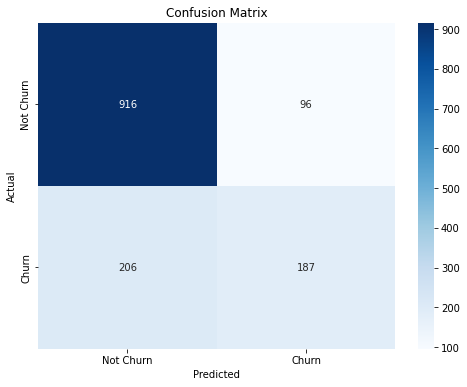

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1012
         1.0       0.66      0.48      0.55       393

    accuracy                           0.79      1405
   macro avg       0.74      0.69      0.71      1405
weighted avg       0.77      0.79      0.77      1405



In [29]:
logistic_model = LogisticRegression(max_iter=1000, random_state = 19)
logistic_model.fit(X_train_pca, y_train)
y_pred = logistic_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
c_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy, "\n")
print("Confusion Matrix:\n")
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:\n", c_report)

**From the above evaluation metrics given by our Logistic Regression model, we can conclude the following:**  

- The model achieved an accuracy of approximately **78.50%**.
- For class 0 (Not Churn), the precision is 0.82. This means that the model was right **82%** of the time while predicting "Not Churn". The recall is 0.91, meaning the model captures **91%** of the actual "Not Churn" instances.
- For class 1 (Churn), the precision is 0.66. This suggests that the model was right **66%** of the time while predicting "Not Churn". The recall is 0.48, meaning the model captures **48%** of the actual "Churn" instances.
- f1-score shows the harmonic mean of precision and recall scores. For class 0 (Not Churn), it is **0.86**, and for class 1 (Churn), it is **0.55**. 
- The weighted average F1-score is **0.77**, considering both classes and accounting for class imbalance. This metric provides an overall evaluation of the model's performance.

Now we can use **Hyperparameter tuning** to optimise the Logistic Regression model that we have made. We will use **GridSearchCV** to find the best hyperparameters.

In [30]:
warnings.filterwarnings("ignore", category=FitFailedWarning)
param_grid = [
    {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': np.logspace(-4, 1, 20),
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': [1000, 2500, 5000]
    }
]
grid_search = GridSearchCV(logistic_model, param_grid = param_grid, cv = 5, scoring = 'accuracy', verbose = True, n_jobs = -1)
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


C:\Users\ak282\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.7378918  ...        nan 0.78685825 0.78703619]
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=19),
             n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 1.83298071e-04, 3.35981829e-04, 6.15848211e-04,
       1.12883789e-03, 2.06913808e-03, 3.79269019e-03, 6.95192796e-03,
       1.27427499e-02, 2.33572147e-02, 4.28133240e-02, 7.84759970e-02,
       1.43844989e-01, 2.63665090e-01, 4.83293024e-01, 8.85866790e-01,
       1.62377674e+00, 2.97635144e+00, 5.45559478e+00, 1.00000000e+01]),
                          'max_iter': [1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             scoring='accuracy', verbose=True)

To check the best hyperparameters, we can use **best_params_** method.

In [31]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.26366508987303583, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}


So the best solver that was found by Grid Search is **saga** method. The best regularization/penalty found by Grid Search is **l1**, which is Lasso regularization.

Now we can use the best logistic regression model based on hyperparameters tuning and predict the test set based on that model.

Accuracy: 0.7765124555160142 

Confusion Matrix:



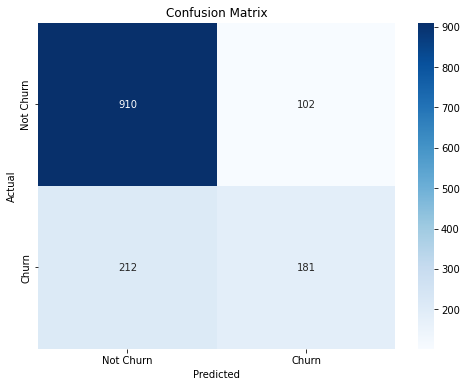

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1012
         1.0       0.66      0.48      0.55       393

    accuracy                           0.79      1405
   macro avg       0.74      0.69      0.71      1405
weighted avg       0.77      0.79      0.77      1405



In [32]:
best_logistic_model = grid_search.best_estimator_
y_pred = best_logistic_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy, "\n")
print("Confusion Matrix:\n")
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:\n", c_report)

From the above results, the accuracy of hyperparameter tuned model is **77.65%**. Therefore, we can conclude that default parameter accuracy is higher than the accuracy achieved with hyperparameter tuning in our logistic regression model. This suggests that default settings of the logistic regression model were performing better than the selected hyperparameter values.

Now we will use **Random Forest** machine learning model. 

Accuracy: 0.7537366548042704 

Confusion Matrix:



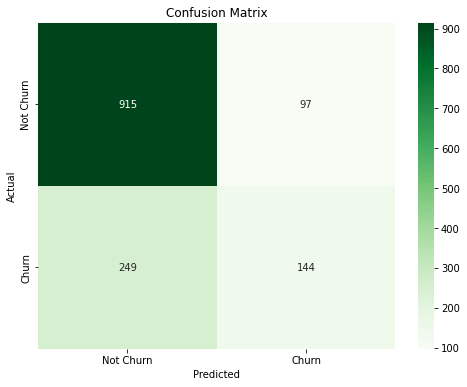

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84      1012
         1.0       0.60      0.37      0.45       393

    accuracy                           0.75      1405
   macro avg       0.69      0.64      0.65      1405
weighted avg       0.73      0.75      0.73      1405



In [33]:
random_forest_model = RandomForestClassifier(random_state = 20)
random_forest_model.fit(X_train_pca, y_train)
y_pred = random_forest_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy, "\n")
print("Confusion Matrix:\n")
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:\n", classification_rep)

The Random Forest model achieved an accuracy of **75.37%**.

Using Grid search and Hyperparameter tuning to optimize the model.

In [34]:
param_grid = [
    {
        'max_depth': [4,8,10],
        'min_samples_leaf': [30, 50 , 70],
        'min_samples_split': [150, 170, 200],
        'n_estimators': [100,200, 300], 
        'max_features': [15,20,25]
    }
]
grid_search = GridSearchCV(estimator = random_forest_model, param_grid = param_grid, cv = 3, scoring = 'accuracy', n_jobs = -1,verbose = 1)
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=20), n_jobs=-1,
             param_grid=[{'max_depth': [4, 8, 10], 'max_features': [15, 20, 25],
                          'min_samples_leaf': [30, 50, 70],
                          'min_samples_split': [150, 170, 200],
                          'n_estimators': [100, 200, 300]}],
             scoring='accuracy', verbose=1)

In [35]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 8, 'max_features': 15, 'min_samples_leaf': 30, 'min_samples_split': 200, 'n_estimators': 200}


Accuracy: 0.7594306049822064 

Confusion Matrix:



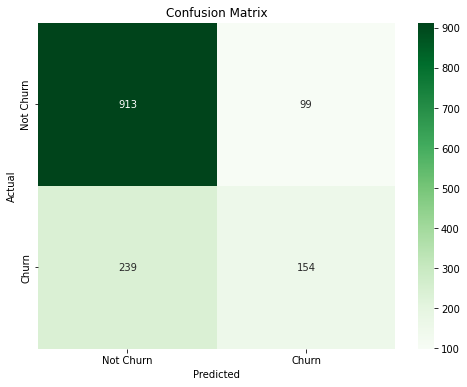

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84      1012
         1.0       0.61      0.39      0.48       393

    accuracy                           0.76      1405
   macro avg       0.70      0.65      0.66      1405
weighted avg       0.74      0.76      0.74      1405



In [36]:
best_random_forest_model = grid_search.best_estimator_
y_pred = best_random_forest_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
c_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy, "\n")
print("Confusion Matrix:\n")
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:\n", c_report)

With hyperparameter tuning, the accuracy of our Random Forest model has increased to **75.94%**.

The last machine learning model that we will use to predict `Churn` is **Support Vector Machine**, which works very well with classification problems.

Accuracy: 0.7786476868327402 

Confusion Matrix:



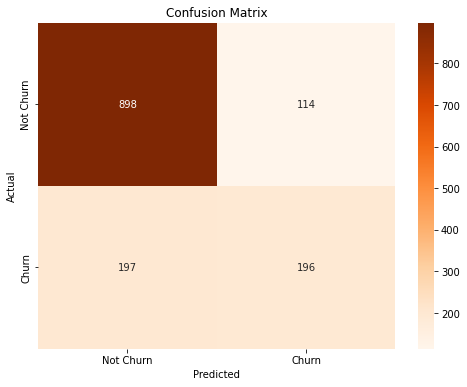

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      1012
         1.0       0.63      0.50      0.56       393

    accuracy                           0.78      1405
   macro avg       0.73      0.69      0.71      1405
weighted avg       0.77      0.78      0.77      1405



In [37]:
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_pca, y_train)
y_pred = svm_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy, "\n")
print("Confusion Matrix:\n")
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:\n", classification_rep)

The accuracy of our Support Vector Machine model is **77.86%**.

Using Grid Search and Hyperparameter tuning to optimize the model.

In [38]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 'scale', 'auto'],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [39]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'sigmoid'}


Accuracy: 0.7786476868327402 

Confusion Matrix:



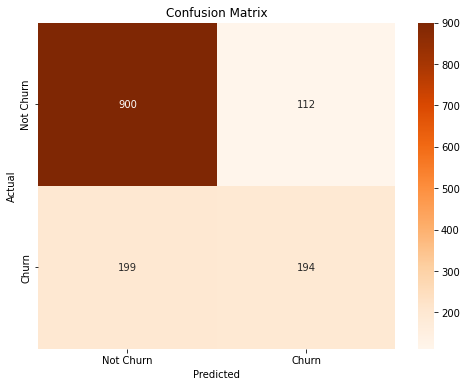

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      1012
         1.0       0.63      0.49      0.56       393

    accuracy                           0.78      1405
   macro avg       0.73      0.69      0.70      1405
weighted avg       0.77      0.78      0.77      1405



In [40]:
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy, "\n")
print("Confusion Matrix:\n")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:\n", classification_rep)

After Hyperparameter tuning, the accuracy remains the same, i.e., **77.86%**.

### Conclusion

In this project, we first explored the dataset Telco-Customer-Churn with basic Pandas functions. Then, we moved on to visualizations, and from the insights we have drawn from them, we can conclude that:

- Approximately 73% of customers did not churn, while 27% experienced churn, highlighting a significant class imbalance.
- Longer tenure is associated with lower churn rates, indicating that customer loyalty plays a crucial role in reducing churn.
- Customers with higher charges and total accumulated charges are more likely to churn, suggesting that pricing and billing practices may influence customer retention.

Then, in order to build machine learning models, we dropped some insignificant columns and encoded categorical variables (Feature Engineering). After transforming the data, we tried 3 different machine learning algorithms, first using default parameters, then after tuning hyperparameters. For this project, the best performing model was **Logistic Regression** with **Default Parameters** with an accuracy of **78.50%**. 

### Areas for Further Investigation

**Handling Class Imbalance**:  

Address the class imbalance issue through techniques like oversampling, undersampling, or using SMOTE. Balancing the dataset can significantly improve the model's ability to predict churn accurately, especially when dealing with imbalanced classes.

**Feature Engineering Refinement**:  

Revisit and refine the feature engineering steps to identify additional relevant features or transformations. Experiment with different encoding techniques or create new informative features that may enhance the model's predictive power and capture more nuances in the data.

**Model Selection and Complexity**:  

Experiment with different machine learning algorithms or ensemble methods to identify if a different model can provide better predictive performance. Adjust the complexity of the chosen model or try more advanced algorithms to capture intricate patterns in the data.

### Citation

Macko, S. (2019, July 11). Telco customer churn (11.1.3+). IBM Cognos Analytics. Retrieved from [IBM](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113).